# Machine Learning Exercise 10

# LeNet - MNIST 



##Import 

Import libraries and print some versions.

To use GPU, set `Edit / Notebook settings / Hardware accelerator` to **GPU**.

In [2]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
import keras

print("Tensorflow version %s" %tf.__version__)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 1.x selected.


Using TensorFlow backend.


Tensorflow version 1.15.2
Found GPU at: /device:GPU:0


## Load data

Load training data from Keras library




In [3]:
def load_data(dataset_name):
    # load data
    if dataset_name == "mnist":
      (Xtrain,Ytrain), (Xtest, Ytest) = keras.datasets.mnist.load_data()
    elif dataset_name == "fmnist":
      (Xtrain,Ytrain), (Xtest, Ytest) = keras.datasets.fashion_mnist.load_data()
    else:
      print("Dataset not expected")

    # get information
    ninput = Xtrain.shape[0]
    imgsize = (Xtrain.shape[1], Xtrain.shape[2])
    input_shape = (Xtrain.shape[1], Xtrain.shape[2], 1)
    ntest = Xtest.shape[0]
    num_classes = max(Ytrain) + 1
    print("Training input %s" %str(Xtrain.shape))
    print("Training output %s" %str(Ytrain.shape))
    print("Test input %s" %str(Xtest.shape))
    print("Test output %s" %str(Ytest.shape))
    print("Input shape: %s" %str(input_shape))
    print("Number of classes: %d" %num_classes)

    # normalize input to [0,1]
    Xtrain = Xtrain / 255.0
    Xtest = Xtest / 255.0
    # reshape input in 4D array
    Xtrain = Xtrain.reshape(ninput,imgsize[0],imgsize[1],1)
    Xtest = Xtest.reshape(ntest,imgsize[0],imgsize[1],1)
    
    # Transform output to one-out-of-n encoding
    Ytrain = keras.utils.to_categorical(Ytrain, num_classes)
    Ytest = keras.utils.to_categorical(Ytest, num_classes)
    
    return [Xtrain,Ytrain,Xtest,Ytest,input_shape,num_classes]


dataset_name = "mnist" # mnist or fmnist
[Xtrain,Ytrain,Xtest,Ytest,input_shape,num_classes] = load_data(dataset_name)

11493376/11490434 [==============================] - 0s 0us/step
Training input (60000, 28, 28)
Training output (60000,)
Test input (10000, 28, 28)
Test output (10000,)
Input shape: (28, 28, 1)
Number of classes: 10


## Show random image



2


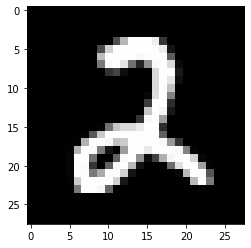

In [4]:
import matplotlib.pyplot as plt
import random

i = random.randrange(0,Xtrain.shape[0])
image = Xtrain[i]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))

label = Ytrain[i].argmax()  # categorical from one-hot-encoding
print(label)

plt.imshow(pixels, cmap='gray')
plt.show()


##LeNet model


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
                         Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras import optimizers

def LeNet(input_shape, num_classes):
    
    print('\nLeNet model')
    model = Sequential()
    
    print('\tC1: Convolutional 6 kernels 5x5')
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding='same'))
    print('\tS2: Average Pooling 2x2 stride 2x2')
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    print('\tC3: Convolutional 16 kernels 5x5')
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    print('\tS4: Average Pooling 2x2 stride 2x2')
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    print('\tC5: Convolutional 120 kernels 5x5')
    model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    model.add(Flatten())
    print('\tF6: Fully connected, 84 units')
    model.add(Dense(84, activation='tanh'))
    print('\tF7: Fully connected, 10 units')
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = 'adam' #alternative 'SGD'
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
    
    return model
 
# create the model
model = LeNet(input_shape,num_classes)
model.summary()


LeNet model
	C1: Convolutional 6 kernels 5x5
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
	S2: Average Pooling 2x2 stride 2x2

	C3: Convolutional 16 kernels 5x5
	S4: Average Pooling 2x2 stride 2x2
	C5: Convolutional 120 kernels 5x5
	F6: Fully connected, 84 units
	F7: Fully connected, 10 units
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_____________________________________________________

## Train

In [12]:
epochs = 10
history = model.fit(Xtrain, Ytrain, batch_size=32, epochs=epochs, validation_data = (Xtest,Ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0670 - val_accuracy: 0.9799
Epoch 2/10
60000/60000 [==============================] - 14s 237us/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0565 - val_accuracy: 0.9839
Epoch 3/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.0501 - val_accuracy: 0.9859
Epoch 4/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0508 - val_accuracy: 0.9859
Epoch 5/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.0100 - accuracy: 0.9966 - val_loss: 0.0467 - val_accuracy: 0.9869
Epoch 6/10
60000/60000 [==============================] - 14s 237us/step - loss: 0.0116 - accuracy: 0.9959 - val_loss: 0.0522 - val_accuracy: 0.9864
Epoch 7/10
60000/60000 [==============================] 

##Evaluate the model

## Print scores

Overall accuracy, precision, recall and F-score 

In [7]:
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

# accuracy
score = model.evaluate(Xtest, Ytest)
print("Test loss: %f" %score[0])
print("Test accuracy: %f" %score[1])

preds = model.predict(Xtest,verbose=1)
Ypred = np.argmax(preds, axis=1)

Ypred = keras.utils.to_categorical(Ypred, num_classes)

print('%s' %str(Ypred.shape))
print('%s' %str(Ytest.shape))

print(classification_report(Ytest, Ypred, digits=3))


  

10000/10000 [==============================] - 1s 107us/step
Test loss: 0.052346
Test accuracy: 0.983800
10000/10000 [==============================] - 1s 73us/step
(10000, 10)
(10000, 10)
              precision    recall  f1-score   support

           0      0.980     0.994     0.987       980
           1      0.996     0.986     0.991      1135
           2      0.982     0.987     0.985      1032
           3      0.982     0.988     0.985      1010
           4      0.968     0.997     0.982       982
           5      0.983     0.985     0.984       892
           6      0.994     0.961     0.977       958
           7      0.983     0.986     0.984      1028
           8      0.979     0.983     0.981       974
           9      0.991     0.969     0.980      1009

   micro avg      0.984     0.984     0.984     10000
   macro avg      0.984     0.984     0.984     10000
weighted avg      0.984     0.984     0.984     10000
 samples avg      0.984     0.984     0.984     10000

##Plot results

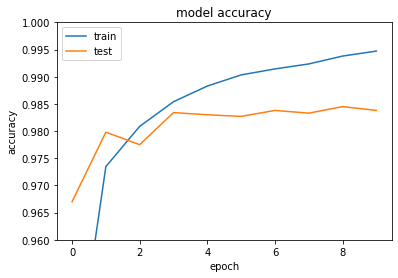

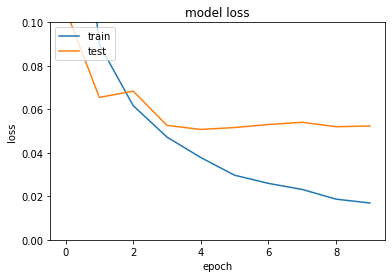

In [8]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.96, 1.0)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.0, 0.1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Home Exercises

**Question 1** 

Compare the model defined above with a model with the same structure but with `ReLU` activation functions in all the layers.


In [9]:
def LeNet_relu(input_shape, num_classes):
    
    print('\nLeNet model')
    model_relu = Sequential()
    
    print('\tC1: Convolutional 6 kernels 5x5')
    model_relu.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding='same'))
    print('\tS2: Average Pooling 2x2 stride 2x2')
    model_relu.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    print('\tC3: Convolutional 16 kernels 5x5')
    model_relu.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
    print('\tS4: Average Pooling 2x2 stride 2x2')
    model_relu.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    print('\tC5: Convolutional 120 kernels 5x5')
    model_relu.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
    model_relu.add(Flatten())
    print('\tF6: Fully connected, 84 units')
    model_relu.add(Dense(84, activation='relu'))
    print('\tF7: Fully connected, 10 units')
    model_relu.add(Dense(num_classes, activation='softmax'))

    optimizer = 'adam' #alternative 'SGD'
    model_relu.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
    
    return model_relu
 
# create the model
model_relu = LeNet(input_shape,num_classes)
model_relu.summary()


LeNet model
	C1: Convolutional 6 kernels 5x5
	S2: Average Pooling 2x2 stride 2x2
	C3: Convolutional 16 kernels 5x5
	S4: Average Pooling 2x2 stride 2x2
	C5: Convolutional 120 kernels 5x5
	F6: Fully connected, 84 units
	F7: Fully connected, 10 units
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 120)         48120     
___

In [13]:
epochs = 10
history_relu = model_relu.fit(Xtrain, Ytrain, batch_size=32, epochs=epochs, validation_data = (Xtest,Ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0495 - val_accuracy: 0.9856
Epoch 2/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.0485 - val_accuracy: 0.9873
Epoch 3/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0136 - accuracy: 0.9952 - val_loss: 0.0498 - val_accuracy: 0.9874
Epoch 4/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0574 - val_accuracy: 0.9867
Epoch 5/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0119 - accuracy: 0.9961 - val_loss: 0.0510 - val_accuracy: 0.9854
Epoch 6/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0489 - val_accuracy: 0.9874
Epoch 7/10
60000/60000 [==============================] 

In [11]:
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

# accuracy
score_relu = model_relu.evaluate(Xtest, Ytest)
print("Test loss: %f" %score_relu[0])
print("Test accuracy: %f" %score_relu[1])

preds_relu = model_relu.predict(Xtest,verbose=1)
Ypred_relu = np.argmax(preds_relu, axis=1)

Ypred_relu = keras.utils.to_categorical(Ypred_relu, num_classes)

print('%s' %str(Ypred_relu.shape))
print('%s' %str(Ytest.shape))

print("Activation function: ReLu")
print(classification_report(Ytest, Ypred_relu, digits=3))

print("\n Without ReLU")
print(classification_report(Ytest, Ypred, digits=3))

10000/10000 [==============================] - 1s 99us/step
Test loss: 0.053573
Test accuracy: 0.984800
10000/10000 [==============================] - 1s 71us/step
(10000, 10)
(10000, 10)
Activation function: ReLu
              precision    recall  f1-score   support

           0      0.987     0.992     0.989       980
           1      0.989     0.995     0.992      1135
           2      0.982     0.990     0.986      1032
           3      0.987     0.990     0.989      1010
           4      0.991     0.987     0.989       982
           5      0.995     0.963     0.979       892
           6      0.977     0.992     0.984       958
           7      0.990     0.968     0.979      1028
           8      0.974     0.988     0.981       974
           9      0.976     0.981     0.979      1009

   micro avg      0.985     0.985     0.985     10000
   macro avg      0.985     0.985     0.985     10000
weighted avg      0.985     0.985     0.985     10000
 samples avg      0.985     

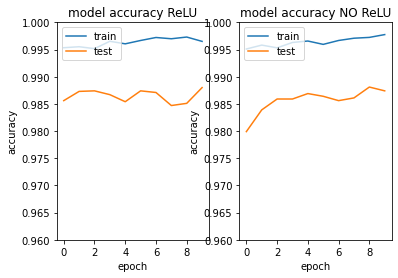

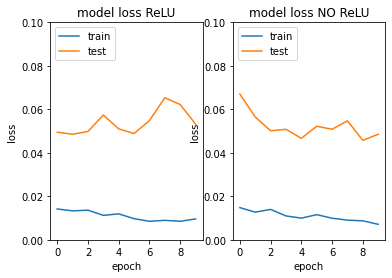

In [39]:
import matplotlib.pyplot as plt

# summarize history for accuracy with relu
plt.subplot(1,2,1)
plt.plot(history_relu.history['accuracy'])
plt.plot(history_relu.history['val_accuracy'])
plt.title('model accuracy ReLU')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.96, 1.0)
plt.legend(['train', 'test'], loc='upper left')


# summarize history for accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy NO ReLU')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.96, 1.0)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss with relu
plt.subplot(1,2,1)
plt.plot(history_relu.history['loss'])
plt.plot(history_relu.history['val_loss'])
plt.title('model loss ReLU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.0, 0.1)
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss without relu
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss NO ReLU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.0, 0.1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()